## 1. 머신 러닝 (50점)
데이터 : 학생 성적에 관한 데이터세트 제공 394행짜리 소규모 데이터.

In [4]:
import pandas as pd
raw_df = pd.read_csv('./../data/student_data.csv')

In [5]:
target_col = 'grade'

In [6]:
# 1-1. 시각화 포함 탐색적 자료분석을 시행하시오. (EDA)

In [ ]:
df = raw_df.copy()
display(df.head())
print(
'''
1. numeric 하지 않은 column 확인, 이후 encoding 필요.
'''
)

,school,sex,paid,activities,famrel,freetime,goout,Dalc,Walc,health,absences,grade,G1,G2
0,GP,F,no,no,4.0,3.0,4.0,1.0,1.0,3.0,6.0,6,5,6
1,GP,F,no,no,5.0,3.0,3.0,1.0,1.0,3.0,4.0,5,5,5
2,GP,F,yes,no,4.0,3.0,2.0,2.0,3.0,3.0,10.0,8,7,8
3,GP,F,yes,yes,3.0,2.0,2.0,1.0,1.0,5.0,2.0,15,15,14
4,GP,F,yes,no,4.0,3.0,2.0,1.0,2.0,5.0,4.0,9,6,10


In [ ]:
display(df.isna().sum()/len(df))
print(
'''
1. 결측치가 존재, 다만 비교적 적은 비율로 보여 대부분 보간하는 것이 유리해보임.
'''
)

school        0.000000
sex           0.000000
paid          0.000000
activities    0.000000
famrel        0.002532
freetime      0.005063
goout         0.007595
Dalc          0.010127
Walc          0.005063
health        0.010127
absences      0.007595
grade         0.000000
G1            0.000000
G2            0.000000
dtype: float64

<Axes: >


1. Target column인 grade와 G1,G2가 매우 높은 상관관계를 보임.
2. 또한, G1,G2가 매우 높은 상관관계를 보임.
3. 이는 이후 다중공선성 문제가 발생할 수 있음으로 인지하고 있어야한다.



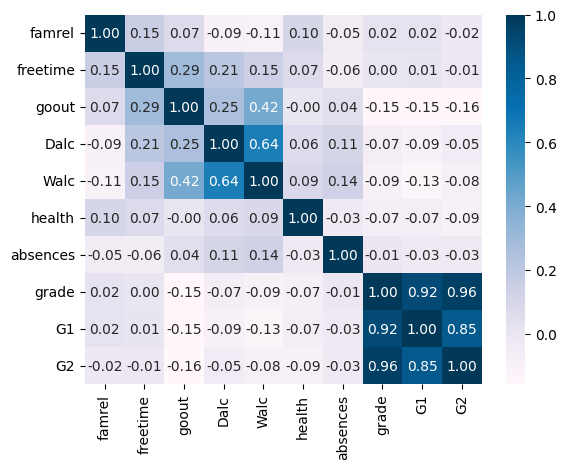

In [28]:
import seaborn as sns
display(
    sns.heatmap(df.select_dtypes(include='number').corr(),
                annot=True, fmt='.2f', cmap='PuBu')
)
print(
'''
1. Target column인 grade와 G1,G2가 매우 높은 상관관계를 보임.
2. 또한, G1,G2가 매우 높은 상관관계를 보임.
3. 이는 이후 다중공선성 문제가 발생할 수 있음으로 인지하고 있어야한다.
'''
)

<Axes: xlabel='activities', ylabel='count'>

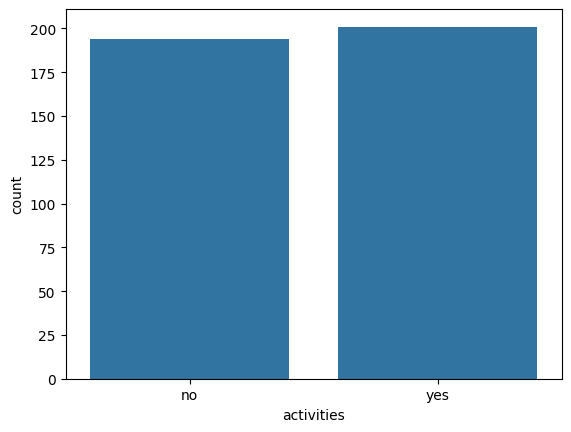

In [34]:
sns.countplot(x=df[col])

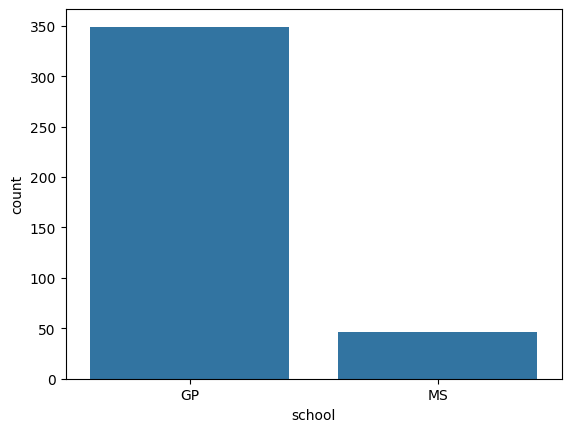

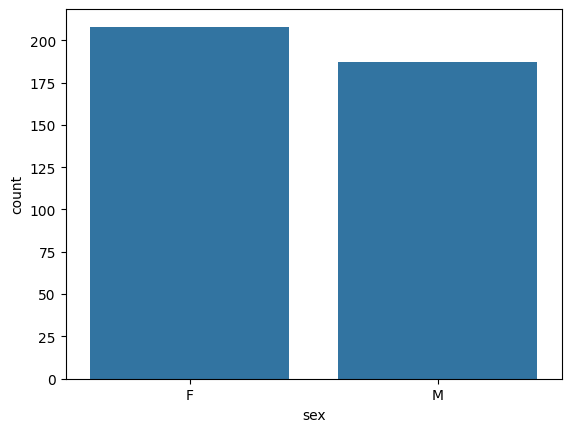

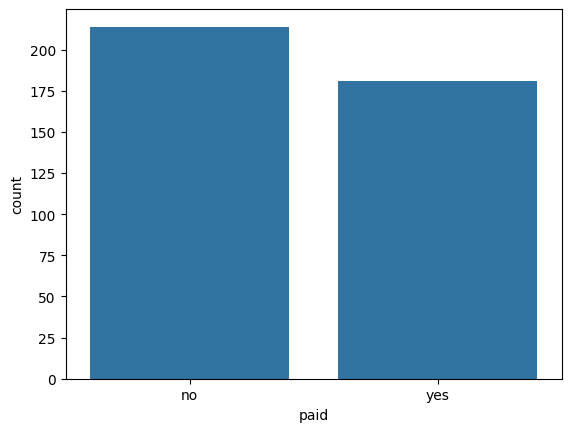

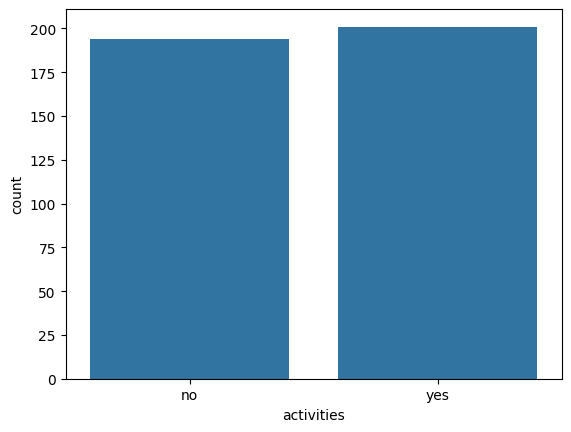

In [ ]:
import matplotlib.pyplot as plt
for col in df.select_dtypes(exclude='number').columns:
    sns.countplot(x=df[col])
    plt.show()
print(
'''
1. school 변수의 경우에는 비율이 상당히 unbalance하다.
2. 만약 school이 target에 큰 영향을 끼친다면, oversampling을 수행하는것이 필요할 수도 있다.
'''
)

In [ ]:
# 1-2. 결측치 식별하고 결측치를 예측하는 두 가지 방법 정도를 쓰고, 선택한 이유를 설명하시오.

In [47]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
display(df.loc[:, df.isna().any()].head())
display(df.isna().sum())

print(
    '''
1. 모든 결측치를 가진 column은 numeric한 값을 가진 값들이다.
2. 현재 float형태이지만, 실제로는 int형태의 값인것으로 보인다.
3. 결측치는 비교적 소수로 결측치를 예측하는것이 나아보인다.
    a) 평균치 대체
        - 결측치를 평균값으로 대체한다.
        - 만약 결측치의 수가 많거나, 데이터에 numeric한 값이 적을때 활용하기 용이하다.
    b) knn 대체
        - 결측치를 knn을 기반으로 예측한다.
        - 만약 결측치의 수가 적거나, 데이터에 numeric한 값이 많을때 활용하기 용이하다.
        - 이번경우에는 결측치의 수가 많지 않고, knn 알고리즘을 활용하기 적절한 dataset으로 판단되어 knn 대체를 사용한다.
    
'''
)
knn_imputer = KNNImputer()

df = raw_df.copy()

impute_cols = df.loc[:, df.isna().any()].columns

object_cols = df.select_dtypes(exclude='number').columns
col_encoder_dict = dict()
for object_col in object_cols:
    lbe = LabelEncoder()
    df[object_col] = lbe.fit_transform(df[object_col])
    col_encoder_dict[object_col] = lbe

X_cols = df.columns.difference([target_col])
df[X_cols] = knn_imputer.fit_transform(df[X_cols], df[target_col])

""
0
1
2
3
4


school        0
sex           0
paid          0
activities    0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
grade         0
G1            0
G2            0
dtype: int64


1. 모든 결측치를 가진 column은 numeric한 값을 가진 값들이다.
2. 현재 float형태이지만, 실제로는 int형태의 값인것으로 보인다.
3. 결측치는 비교적 소수로 결측치를 예측하는것이 나아보인다.
    a) 평균치 대체
        - 결측치를 평균값으로 대체한다.
        - 만약 결측치의 수가 많거나, 데이터에 numeric한 값이 적을때 활용하기 용이하다.
    b) knn 대체
        - 결측치를 knn을 기반으로 예측한다.
        - 만약 결측치의 수가 적거나, 데이터에 numeric한 값이 많을때 활용하기 용이하다.
        - 이번경우에는 결측치의 수가 많지 않고, knn 알고리즘을 활용하기 적절한 dataset으로 판단되어 knn 대체를 사용한다.




In [50]:
raw_df.select_dtypes(exclude='number')

,school,sex,paid,activities
0,GP,F,no,no
1,GP,F,no,no
2,GP,F,yes,no
3,GP,F,yes,yes
4,GP,F,yes,no
...,...,...,...,...
390,MS,M,yes,no
391,MS,M,no,no
392,MS,M,no,no
393,MS,M,no,no


In [ ]:
# 1-3. 범주형 변수 인코딩이 필요한 경우를 식별하고, 변환을 적용하시오. 선택한 이유를 설명하시오.
display(raw_df.select_dtypes(exclude='number').head())
print(
'''
1. school,sex,paid, activities column의 경우에는 ml 모델 학습을 위해서는 수치형 변수로 변환이 필요하다.
2. 이중 school의 경우에는 유의미한 unbalance함이 있고 나머지는 없는 것으로 보인다.
3. 모든 범주형 변수는 binary한 형태로 one-hot-encoding과 label-encoding 모두 적용가능하다.
4. 이번 경우에는 label-encoding을 진행하였다. (서열형 변수가 아니지만, binary하기 때문에 무관하다.)
'''
)

In [ ]:
# 1.4. 데이터 분할 방법을 2가지 쓰고 적절한 데이터 분할을 적용. 선택한 이유 설명하시오.


1. 랜덤 분할
    - 랜덤하게 데이터를 분할한다.
    - 일반적으로 target값이 balance할때 사용한다.
    - 이후 model이 접하게 될 데이터와 가장 유사할 것이라는 장점이 있다.
2. stratified 분할
    - target값의 비율을 맞춰 분할한다.
    - 학습데이터와 검증데이터의 유사도를 높일 수 있다.

이번 경우에는 target값이 numeric하며 정규분포와 유사한 형태를 가지고 있어 random split을 진행한다.



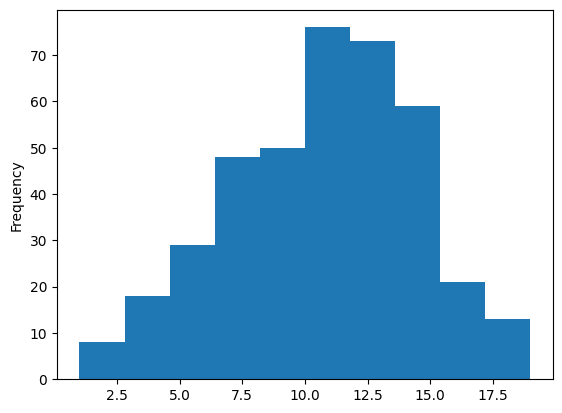

In [54]:
from sklearn.model_selection import train_test_split
df['grade'].plot(kind='hist')
print(
    '''
1. 랜덤 분할
    - 랜덤하게 데이터를 분할한다.
    - 일반적으로 target값이 balance할때 사용한다.
    - 이후 model이 접하게 될 데이터와 가장 유사할 것이라는 장점이 있다.
2. stratified 분할
    - target값의 비율을 맞춰 분할한다.
    - 학습데이터와 검증데이터의 유사도를 높일 수 있다.

이번 경우에는 target값이 numeric하며 정규분포와 유사한 형태를 가지고 있어 random split을 진행한다.
'''
)
X = df.drop(columns=[target_col])
y = df.loc[:, target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

In [ ]:
# 1.5. svm, xgboost, randomforest 3개의 알고리즘 공통점을 쓰고 학생성적 예측 분석에 적합한 알고리즘인지 설명하시오.
print(
'''
공통점
    1. 모두 numeric한 feature를 활용하는 알고리즘이다.
        - 범주형 변수의 경우 encoding이 필요하다.
    2. 모두 classification과 regression에 활용가능한 알고리즘이다.
    
    3. 모두 hyper-parameter-tuning이 가능하며 성능 향상을 위해 필요하다.

일단은 세가지 알고리즘 모두 학생성적 예측에 적합한 알고리즘이다.
'''
)

In [ ]:
# 1.6. 세 가지 모델 모두 모델링 해보고 가장 적합한 알고리즘 선택하고 이유 설명. 한계점 설명하고 보완 가능한 부분 설명하고,
# 현업에서 사용시 주의할 점 등에 대해 기술하시오.

In [55]:
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score

In [57]:
svr = SVR()
rfr = RandomForestRegressor()
xgbr = XGBRegressor()

models = [
    ('SVM', svr),
    ('RandomForest', rfr),
    ('XGB', xgbr)
]
cross_val_score(xgbr, X_train, y_train)
model_score_dict = dict()
for model_name, model in models:
    scores = cross_val_score(model, X_train, y_train)
    model_score_dict[model_name] = scores


In [67]:
model_score_df = pd.DataFrame(model_score_dict).T
model_score_df['var'] = model_score_df.var(axis=1)
model_score_df['mean'] = model_score_df.mean(axis=1)
model_score_df

,0,1,2,3,4,var,mean
SVM,0.930330,0.948551,0.966674,0.931941,0.950778,0.000225,0.788083
RandomForest,0.985663,0.966007,0.976627,0.955374,0.954835,0.000181,0.806448
XGB,0.980261,0.966857,0.974783,0.960896,0.944247,0.000195,0.804540


In [ ]:
print(
'''
1. Parameter tunning 없이 각 모델의 score를 확인한다.
2. randomforest가 가장 낮은 varinance와 가장 높은 mean을 보여주었다.
3. 일단 randomforest를 baseline으로 파라미터 튜닝을 수행한다.
'''
)

##  2. 통계분석 (50점) 

In [ ]:
# 2. 회귀분석 문제. DATA = boston data (연속형 독립변수 1개, 종속변수 1개로 구성된 보스턴 집값 데이터셋)  (총 29점 )

In [70]:
import pandas as pd
df = pd.read_csv('./../data/prob_1_2_1.csv')
X, y = df.iloc[:, :-1], df.iloc[:, -1]

FileNotFoundError: [Errno 2] No such file or directory: './../data/prob_1_2_1.csv'

In [ ]:
# 2-1. 데이터 8:2로 분할하고 선형회귀 적용하시오. 결정계수와 rmse 구하시오

In [ ]:
# 2-2. 데이터 8:2로 분할하고 릿지 회귀 적용하시오.
# alpha 값을 0부터 1까지 0.1단위로 모두 탐색해서 결정계수가 가장 높을때의 알파를 찾고,
# 해당 알파로 다시 모델을 학습해서 결정계수와 rmse를 계산

In [ ]:
# 2-3. 데이터 8:2로 분할하고 라쏘 회귀 적용하시오.
# alpha 값을 0부터 1까지 0.1단위로 모두 탐색해서 결정계수가 가장 높을때의 알파를 찾고,
# 해당 알파로 다시 모델을 학습해서 결정계수와 rmse를 계산


In [71]:
# 3. 독립변수 하나 종속변수 하나 소규모 데이터 다항회귀(12점)
# 다항 회귀를 3차까지 적용시켜 계수를 구하고 각 차수별 데이터포인트 스캐터 플롯과 기울기 선을 그리세요.

In [72]:
import pandas as pd
import numpy as np

## 데이터 불러오기 
m = 100
X = 6 * np.random.rand(m,1) - 3
y = 3 * X**3  + X**2 + 2*X + 2 + np.random.randn(m,1)  #노이즈 포함

line = np.linspace(-3,3,100, endpoint=False).reshape(-1,1)

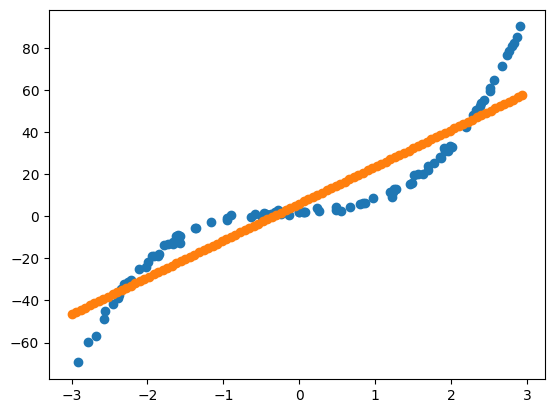

In [ ]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
lr = LinearRegression()
lr.fit(X, y)
plt.scatter(X, y)
plt.scatter(line, lr.predict(line))

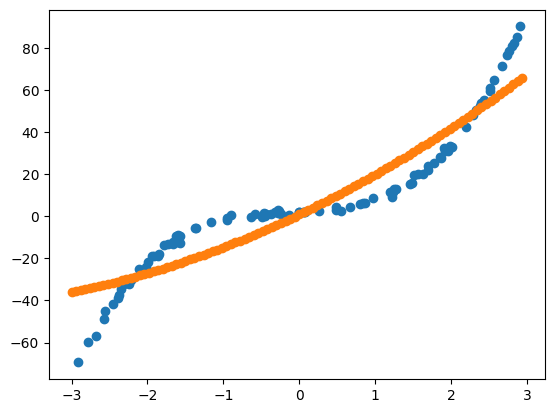

In [85]:
X_2 = np.concatenate([X**2, X], axis=1)
line_2 = np.concatenate([line**2, line], axis=1)

lr.fit(X_2, y)
plt.scatter(X, y)
plt.scatter(line, lr.predict(line_2))

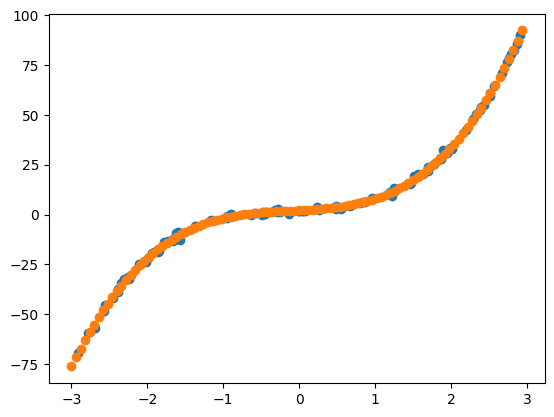

In [86]:
X_3 = np.concatenate([X**3, X**2, X], axis=1)
line_3 = np.concatenate([line**3, line**2, line], axis=1)

lr.fit(X_3, y)
plt.scatter(X, y)
plt.scatter(line, lr.predict(line_3))

In [89]:
lr.coef_

array([[3.01315744, 0.95201899, 1.8674026 ]])

4. ANOVA분석 (9점)<br>
변수 3개(하나는 범주형 변수/ 나머지 두 개는 수치형 연속변수)<br>
이원분산분석을 수행하고 통계표를 작성하시오.<br>

분산분석은 종속변수(반응변수)에 대해 두 개의 범주형 변수 A,B의 영향을 알아보기 위해 사용되는 검증 방법이다.

- <b>가. 상호작용효과 검정에 대한 가설</b><br>
1) 귀무가설 H0: region과 avocado type 간에는 상호작용 효과가 없다. <br>
2) 대립가설 H1: region과 avocado type 간에는 상호작용 효과가 있다. <br>


- <b>나. 주효과 검정에 대한 가설</b> <br>
1) 귀무가설 H0: region 종류에 따른 AveragePrice 차이는 존재하지 않는다. <br>
2) 대립가설 H1: region 종류에 따른 AveragePrice 차이는 존재한다. <br> 
3) 귀무가설 H0: type 종류에 따른 AveragePrice 차이는 존재하지 않는다. <br>
4) 대립가설 H1: type 종류에 따른 AveragePrice 차이는 존재한다. <br> 
<br> 


In [106]:
import pandas as pd
import statsmodels.api as sm 
from statsmodels.formula.api import ols

raw_df = pd.read_csv('./../data/avocado.csv')

df = raw_df.copy()
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [ ]:
display(raw_df.groupby(['type','region']).size().value_counts())
print(
'''
본 데이터는 region×type 모든 조합에서 표본 수가 동일한 균형 설계이므로, Type I/II/III sum of squares 결과가 동일하다. 
이에 type=2 anova를 수행하여 가설을 검정한다.
'''
)

169    107
166      1
Name: count, dtype: int64

In [107]:
model = ols('AveragePrice ~ C(region)*C(type)', data=df)
model_fitted = model.fit()
anova_table = sm.stats.anova_lm(model_fitted, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(region),497.256738,53.0,139.328541,0.000000e+00
C(type),1121.987963,1.0,16661.860020,0.000000e+00
C(region):C(type),117.835096,53.0,33.016731,2.386829e-315
Residual,1221.591324,18141.0,NaN,NaN


In [108]:
print(
'''
1. 
    C(region):C(type)의 PR(>F)가 0.05이하
        - 상호작용효과는 존재한다.

2.
    C(region)의 PR(>F)가 0.05 이하
        - region에 따른 AveragePrice 차이가 존재한다.

3.
    C(type)의 PR(>F)가 0.05 이하
        - type에 따른 AveragePrice 차이가 존재한다.
'''
)


1. 
    C(region):C(type)의 PR(>F)가 0.05이하
        - 상호작용효과는 존재한다.

2.
    C(region)의 PR(>F)가 0.05 이하
        - region에 따른 AveragePrice 차이가 존재한다.

3.
    C(type)의 PR(>F)가 0.05 이하
        - type에 따른 AveragePrice 차이가 존재한다.



In [ ]:
ㅁ